In [1]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
Original_data = pd.read_csv(r'D:\william\OneDrive - UW-Madison\UW-Madison\722\-2025AAE722_William-J\Final Project\DataCoSupplyChainDataset1.csv')
data = Original_data.copy()
data.head()

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,...,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Image,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,2/3/2018 22:56,Standard Class
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/18/2018 12:27,Standard Class
2,CASH,4,4,-247.779999,309.720001,Shipping on time,0,73,Sporting Goods,San Jose,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/17/2018 12:06,Standard Class
3,DEBIT,3,4,22.860001,304.809998,Advance shipping,0,73,Sporting Goods,Los Angeles,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/16/2018 11:45,Standard Class
4,PAYMENT,2,4,134.210007,298.250000,Advance shipping,0,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/15/2018 11:24,Standard Class


In [4]:
filtered_data = data[['Type','Benefit per order','Delivery Status','Late_delivery_risk','Category Name','Customer Country','Department Name','Market','order date (DateOrders)','Order Item Discount Rate','Order Item Product Price','Order Item Quantity','Order Item Profit Ratio','Order Status','Shipping Mode']]
filtered_data.head()

,Type,Benefit per order,Delivery Status,Late_delivery_risk,Category Name,Customer Country,Department Name,Market,order date (DateOrders),Order Item Discount Rate,Order Item Product Price,Order Item Quantity,Order Item Profit Ratio,Order Status,Shipping Mode
0,DEBIT,91.250000,Advance shipping,0,Sporting Goods,Puerto Rico,Fitness,Pacific Asia,1/31/2018 22:56,0.04,327.75,1,0.29,COMPLETE,Standard Class
1,TRANSFER,-249.089996,Late delivery,1,Sporting Goods,Puerto Rico,Fitness,Pacific Asia,1/13/2018 12:27,0.05,327.75,1,-0.80,PENDING,Standard Class
2,CASH,-247.779999,Shipping on time,0,Sporting Goods,EE. UU.,Fitness,Pacific Asia,1/13/2018 12:06,0.06,327.75,1,-0.80,CLOSED,Standard Class
3,DEBIT,22.860001,Advance shipping,0,Sporting Goods,EE. UU.,Fitness,Pacific Asia,1/13/2018 11:45,0.07,327.75,1,0.08,COMPLETE,Standard Class
4,PAYMENT,134.210007,Advance shipping,0,Sporting Goods,Puerto Rico,Fitness,Pacific Asia,1/13/2018 11:24,0.09,327.75,1,0.45,PENDING_PAYMENT,Standard Class


In [11]:
# Convert 'order date (DateOrders)' to datetime and separate date and time
# First, convert to datetime format
filtered_data['order date (DateOrders)'] = pd.to_datetime(filtered_data['order date (DateOrders)'])

# Create separate date and time columns
filtered_data['Order Date'] = filtered_data['order date (DateOrders)'].dt.date
filtered_data['Order Time'] = filtered_data['order date (DateOrders)'].dt.time
# Create a proper copy to avoid pandas warnings
filtered_data = filtered_data.drop(columns=['order date (DateOrders)'])
filtered_data = filtered_data.sort_values('Order Date').reset_index(drop=True)
filtered_data.head()

,Type,Benefit per order,Delivery Status,Late_delivery_risk,Category Name,Customer Country,Department Name,Market,Order Item Discount Rate,Order Item Product Price,Order Item Quantity,Order Item Profit Ratio,Order Status,Shipping Mode,Order Date,Order Time
0,CASH,42.250000,Shipping on time,0,Cleats,EE. UU.,Apparel,LATAM,0.03,59.990002,2,0.36,CLOSED,Second Class,2015-01-01,21:01:00
1,DEBIT,23.270000,Late delivery,1,Shop By Sport,Puerto Rico,Golf,LATAM,0.03,39.990002,4,0.15,COMPLETE,Standard Class,2015-01-01,15:24:00
2,CASH,88.790001,Advance shipping,0,Camping & Hiking,EE. UU.,Fan Shop,LATAM,0.20,299.980011,1,0.37,CLOSED,Standard Class,2015-01-01,00:00:00
3,CASH,7.020000,Late delivery,1,Men's Footwear,EE. UU.,Apparel,LATAM,0.10,129.990005,1,0.06,CLOSED,Second Class,2015-01-01,08:03:00
4,TRANSFER,57.959999,Late delivery,1,Men's Footwear,EE. UU.,Apparel,LATAM,0.09,129.990005,1,0.49,PROCESSING,Standard Class,2015-01-01,09:48:00


In [51]:
# Let's check the date ranges in original vs transformed data
print("=== DATE RANGE VERIFICATION ===")
print("\n1. Original Data Date Range:")
print("Raw date column sample:")
print(Original_data['order date (DateOrders)'].head())
print(f"Original data date range: {Original_data['order date (DateOrders)'].min()} to {Original_data['order date (DateOrders)'].max()}")

print("\n2. After datetime conversion:")
print("Converted date column sample:")
print(filtered_data['Order Date'].head())
print(f"Converted data date range: {filtered_data['Order Date'].min()} to {filtered_data['Order Date'].max()}")

print("\n3. Time Category Summary Date Range:")
print(f"Time series data date range: {time_category_summary['Order Date'].min()} to {time_category_summary['Order Date'].max()}")

print("\n4. Monthly Summary Date Range:")  
print(f"Monthly data date range: {monthly_summary['Month_Date'].min()} to {monthly_summary['Month_Date'].max()}")

print("\n5. Data Shape Comparison:")
print(f"Original data shape: {Original_data.shape}")
print(f"Filtered data shape: {filtered_data.shape}")
print(f"Time category summary shape: {time_category_summary.shape}")
print(f"Monthly summary shape: {monthly_summary.shape}")

# Check for any data type issues
print(f"\n6. Data Types:")
print(f"Original date column dtype: {Original_data['order date (DateOrders)'].dtype}")
print(f"Converted Order Date dtype: {filtered_data['Order Date'].dtype}")
print(f"Time series Order Date dtype: {time_category_summary['Order Date'].dtype}")
print(f"Monthly Month_Date dtype: {monthly_summary['Month_Date'].dtype}")

=== DATE RANGE VERIFICATION ===

1. Original Data Date Range:
Raw date column sample:
0    1/31/2018 22:56
1    1/13/2018 12:27
2    1/13/2018 12:06
3    1/13/2018 11:45
4    1/13/2018 11:24
Name: order date (DateOrders), dtype: object
Original data date range: 1/1/2015 0:00 to 9/9/2017 9:50

2. After datetime conversion:
Converted date column sample:
0    2015-01-01
1    2015-01-01
2    2015-01-01
3    2015-01-01
4    2015-01-01
Name: Order Date, dtype: object
Converted data date range: 2015-01-01 to 2018-01-31

3. Time Category Summary Date Range:
Time series data date range: 2015-01-01 00:00:00 to 2018-01-31 00:00:00

4. Monthly Summary Date Range:
Monthly data date range: 2015-01-01 00:00:00 to 2018-01-01 00:00:00

5. Data Shape Comparison:
Original data shape: (180519, 53)
Filtered data shape: (180519, 16)
Time category summary shape: (17151, 9)
Monthly summary shape: (853, 9)

6. Data Types:
Original date column dtype: object
Converted Order Date dtype: object
Time series Order D

In [52]:
# Let's examine the original date format more closely
print("=== DETAILED DATE FORMAT ANALYSIS ===")

# Check unique date formats in original data
print("\n1. Sample of unique original date strings (first 20):")
unique_dates_sample = Original_data['order date (DateOrders)'].unique()[:20]
for i, date_str in enumerate(unique_dates_sample):
    print(f"{i+1:2d}. '{date_str}'")

# Check if there are any parsing issues
print(f"\n2. Total unique dates in original data: {Original_data['order date (DateOrders)'].nunique()}")
print(f"   Date range: {Original_data['order date (DateOrders)'].min()} to {Original_data['order date (DateOrders)'].max()}")

# Let's check if pandas can properly parse these dates
print("\n3. Testing pandas date parsing:")
test_conversion = pd.to_datetime(Original_data['order date (DateOrders)'].head(10))
print("First 10 converted dates:")
print(test_conversion)
print(f"Converted range: {test_conversion.min()} to {test_conversion.max()}")

# Check for any problematic date entries
print(f"\n4. Checking for any null or problematic dates:")
print(f"   Null dates in original: {Original_data['order date (DateOrders)'].isnull().sum()}")
print(f"   Null dates in filtered: {filtered_data['Order Date'].isnull().sum()}")

# Let's also check the year distribution
print(f"\n5. Year distribution in converted data:")
filtered_data_copy = filtered_data.copy()
filtered_data_copy['Order Date'] = pd.to_datetime(filtered_data_copy['Order Date'])
filtered_data_copy['Year'] = filtered_data_copy['Order Date'].dt.year
year_counts = filtered_data_copy['Year'].value_counts().sort_index()
print(year_counts)

=== DETAILED DATE FORMAT ANALYSIS ===

1. Sample of unique original date strings (first 20):
 1. '1/31/2018 22:56'
 2. '1/13/2018 12:27'
 3. '1/13/2018 12:06'
 4. '1/13/2018 11:45'
 5. '1/13/2018 11:24'
 6. '1/13/2018 11:03'
 7. '1/13/2018 10:42'
 8. '1/13/2018 10:21'
 9. '1/13/2018 10:00'
10. '1/13/2018 9:39'
11. '1/13/2018 9:18'
12. '1/13/2018 8:57'
13. '1/13/2018 8:36'
14. '1/13/2018 8:15'
15. '1/13/2018 7:54'
16. '1/13/2018 7:33'
17. '1/13/2018 7:12'
18. '1/13/2018 6:51'
19. '1/13/2018 6:30'
20. '1/13/2018 6:09'

2. Total unique dates in original data: 65752
   Date range: 1/1/2015 0:00 to 9/9/2017 9:50

3. Testing pandas date parsing:
First 10 converted dates:
0   2018-01-31 22:56:00
1   2018-01-13 12:27:00
2   2018-01-13 12:06:00
3   2018-01-13 11:45:00
4   2018-01-13 11:24:00
5   2018-01-13 11:03:00
6   2018-01-13 10:42:00
7   2018-01-13 10:21:00
8   2018-01-13 10:00:00
9   2018-01-13 09:39:00
Name: order date (DateOrders), dtype: datetime64[ns]
Converted range: 2018-01-13 09:39

In [53]:
# Let's check what the current monthly summary shows for date ranges
print("=== MONTHLY SUMMARY DATE ANALYSIS ===")

print(f"\n1. Monthly Summary Date Range:")
print(f"   Start: {monthly_summary['Month_Date'].min()}")
print(f"   End: {monthly_summary['Month_Date'].max()}")
print(f"   Total months: {monthly_summary['Month'].nunique()}")

print(f"\n2. Month breakdown:")
month_counts = monthly_summary.groupby('Month').size().sort_index()
print("Records per month:")
print(month_counts.head(10))
print("...")
print(month_counts.tail(10))

print(f"\n3. Sample of monthly data:")
print(monthly_summary[['Month', 'Month_Date', 'Category Name', 'Daily Demand']].head(10))

print(f"\n4. Let's verify the time_category_summary source:")
print(f"   Time category date range: {time_category_summary['Order Date'].min()} to {time_category_summary['Order Date'].max()}")
print(f"   Records per year in time_category_summary:")
time_cat_copy = time_category_summary.copy()
time_cat_copy['Year'] = time_cat_copy['Order Date'].dt.year
yearly_records = time_cat_copy.groupby('Year').size()
print(yearly_records)

=== MONTHLY SUMMARY DATE ANALYSIS ===

1. Monthly Summary Date Range:
   Start: 2015-01-01 00:00:00
   End: 2018-01-01 00:00:00
   Total months: 37

2. Month breakdown:
Records per month:
Month
2015-01    24
2015-02    24
2015-03    24
2015-04    24
2015-05    24
2015-06    24
2015-07    24
2015-08    24
2015-09    24
2015-10    24
Freq: M, dtype: int64
...
Month
2017-04    31
2017-05    24
2017-06    24
2017-07    24
2017-08    24
2017-09    26
2017-10    20
2017-11     8
2017-12    14
2018-01    10
Freq: M, dtype: int64

3. Sample of monthly data:
     Month Month_Date        Category Name  Daily Demand
0  2015-01 2015-01-01          Accessories           154
1  2015-01 2015-01-01  Baseball & Softball            68
2  2015-01 2015-01-01         Boxing & MMA            24
3  2015-01 2015-01-01     Camping & Hiking           415
4  2015-01 2015-01-01     Cardio Equipment          1188
5  2015-01 2015-01-01               Cleats          2390
6  2015-01 2015-01-01          Electronics   

In [55]:
# Let's check what's happening with 2018 data in the graphs
print("=== 2018 DATA INVESTIGATION ===")

print("1. Checking 2018 data in monthly_summary:")
monthly_2018 = monthly_summary[monthly_summary['Month_Date'].dt.year == 2018]
print(f"Number of 2018 records in monthly_summary: {len(monthly_2018)}")
if len(monthly_2018) > 0:
    print("2018 data:")
    print(monthly_2018[['Month_Date', 'Category Name', 'Daily Demand']].head(15))

print(f"\n2. Checking top categories in 2018:")
top_categories = category_summary.head(5)['Category Name'].tolist()
print(f"Top 5 categories: {top_categories}")

monthly_2018_top = monthly_2018[monthly_2018['Category Name'].isin(top_categories)]
print(f"2018 records for top 5 categories: {len(monthly_2018_top)}")
if len(monthly_2018_top) > 0:
    print(monthly_2018_top[['Month_Date', 'Category Name', 'Daily Demand']])

print(f"\n3. Let's check the original 2018 data:")
filtered_2018 = filtered_data[pd.to_datetime(filtered_data['Order Date']).dt.year == 2018]
print(f"2018 records in filtered_data: {len(filtered_2018)}")
if len(filtered_2018) > 0:
    print("Sample 2018 data:")
    print(filtered_2018[['Order Date', 'Category Name', 'Order Item Quantity']].head(10))
    
    # Check category distribution in 2018
    print(f"\n2018 data by category:")
    category_2018 = filtered_2018.groupby('Category Name')['Order Item Quantity'].sum().sort_values(ascending=False)
    print(category_2018.head(10))

=== 2018 DATA INVESTIGATION ===
1. Checking 2018 data in monthly_summary:
Number of 2018 records in monthly_summary: 10
2018 data:
    Month_Date      Category Name  Daily Demand
843 2018-01-01               DVDs             7
844 2018-01-01             Garden            96
845 2018-01-01  Health and Beauty           123
846 2018-01-01     Men's Clothing            31
847 2018-01-01              Music           144
848 2018-01-01       Pet Supplies           246
849 2018-01-01     Sporting Goods           212
850 2018-01-01               Toys           276
851 2018-01-01        Video Games           610
852 2018-01-01   Women's Clothing           378

2. Checking top categories in 2018:
Top 5 categories: ['Cleats', "Women's Apparel", 'Indoor/Outdoor Games', 'Cardio Equipment', 'Shop By Sport']
2018 records for top 5 categories: 0

3. Let's check the original 2018 data:
2018 records in filtered_data: 2123
Sample 2018 data:
        Order Date Category Name  Order Item Quantity
178396  20

In [34]:
# Create aggregated dataframe by Category Name for time trend analysis
category_summary = filtered_data.groupby('Category Name').agg({
    'Order Item Quantity': 'sum',  # Total demand (sum of quantities)
    'Order Item Product Price': 'mean',  # Average product price
    'Order Item Discount Rate': 'mean',  # Average discount rate
    'Order Item Profit Ratio': 'mean',  # Average profit ratio
    'Benefit per order': ['count', lambda x: (x < 0).sum()]  # Total count and negative profit count
}).reset_index()

# Flatten column names
category_summary.columns = ['Category Name', 'Total Demand', 'Avg Product Price', 'Avg Discount Rate', 'Avg Profit Ratio', 'Total Orders', 'Negative Profit Orders']

# Calculate the ratio of negative profit trades
category_summary['Negative Profit Ratio'] = (category_summary['Negative Profit Orders'] / category_summary['Total Orders']).round(4)

# Round numerical columns for better readability
category_summary['Avg Product Price'] = category_summary['Avg Product Price'].round(2)
category_summary['Avg Discount Rate'] = category_summary['Avg Discount Rate'].round(4)
category_summary['Avg Profit Ratio'] = category_summary['Avg Profit Ratio'].round(4)

# Sort by total demand (descending) to see most popular categories first
category_summary = category_summary.sort_values('Total Demand', ascending=False).reset_index(drop=True)
category_summary.head(10)  # Display top 10 categories

,Category Name,Total Demand,Avg Product Price,Avg Discount Rate,Avg Profit Ratio,Total Orders,Negative Profit Orders,Negative Profit Ratio
0,Cleats,73734,60.34,0.1016,0.1246,24551,4590,0.1870
1,Women's Apparel,62956,50.00,0.1017,0.1222,21035,3923,0.1865
2,Indoor/Outdoor Games,57803,49.98,0.1015,0.1239,19298,3617,0.1874
3,Cardio Equipment,37587,98.21,0.1017,0.1188,12487,2332,0.1868
4,Shop By Sport,32726,40.63,0.1014,0.1122,10984,2154,0.1961
5,Men's Footwear,22246,129.99,0.1017,0.1201,22246,4169,0.1874
6,Fishing,17325,399.98,0.1017,0.1214,17325,3209,0.1852
7,Water Sports,15540,200.38,0.1017,0.1165,15540,2924,0.1882
8,Camping & Hiking,13729,299.98,0.1017,0.1159,13729,2590,0.1887
9,Electronics,9436,39.43,0.1018,0.1246,3156,562,0.1781


In [50]:
# Create time-based aggregated dataframe for time trend analysis
# Group by both Order Date and Category Name
time_category_summary = filtered_data.groupby(['Order Date', 'Category Name']).agg({
    'Order Item Quantity': 'sum',  # Daily demand per category
    'Order Item Product Price': 'mean',  # Daily average price per category
    'Order Item Discount Rate': 'mean',  # Daily average discount per category
    'Order Item Profit Ratio': 'mean',  # Daily average profit ratio per category
    'Benefit per order': ['count', lambda x: (x < 0).sum()]  # Total count and negative profit count
}).reset_index()

# Flatten column names
time_category_summary.columns = ['Order Date', 'Category Name', 'Daily Demand', 'Avg Product Price', 'Avg Discount Rate', 'Avg Profit Ratio', 'Total Orders', 'Negative Profit Orders']

# Calculate the ratio of negative profit trades
time_category_summary['Negative Profit Ratio'] = (time_category_summary['Negative Profit Orders'] / time_category_summary['Total Orders']).round(4)

# Convert Order Date back to datetime for time series analysis
time_category_summary['Order Date'] = pd.to_datetime(time_category_summary['Order Date'])

# Round numerical columns
time_category_summary['Avg Product Price'] = time_category_summary['Avg Product Price'].round(2)
time_category_summary['Avg Discount Rate'] = time_category_summary['Avg Discount Rate'].round(4)
time_category_summary['Avg Profit Ratio'] = time_category_summary['Avg Profit Ratio'].round(4)

# Sort by date and category
time_category_summary = time_category_summary.sort_values(['Order Date', 'Category Name']).reset_index(drop=True)

time_category_summary  # Display sample of time-category summary

,Order Date,Category Name,Daily Demand,Avg Product Price,Avg Discount Rate,Avg Profit Ratio,Total Orders,Negative Profit Orders,Negative Profit Ratio
0,2015-01-01,Accessories,11,24.99,0.1625,0.1250,4,0,0.0000
1,2015-01-01,Baseball & Softball,2,34.99,0.2000,0.1200,1,0,0.0000
2,2015-01-01,Camping & Hiking,20,299.98,0.1105,0.2985,20,2,0.1000
3,2015-01-01,Cardio Equipment,28,99.99,0.0722,0.2267,9,1,0.1111
4,2015-01-01,Cleats,68,59.99,0.1184,0.1240,25,5,0.2000
...,...,...,...,...,...,...,...,...,...
17146,2018-01-30,Women's Clothing,69,215.82,0.1029,0.1226,69,11,0.1594
17147,2018-01-31,Sporting Goods,1,327.75,0.0400,0.2900,1,0,0.0000
17148,2018-01-31,Toys,1,11.54,0.0600,0.1400,1,0,0.0000
17149,2018-01-31,Video Games,1,39.75,0.1200,0.2800,1,0,0.0000


In [56]:
# Create monthly aggregated data for cleaner trend visualization
# Add month information to the time_category_summary
monthly_data = time_category_summary.copy()
monthly_data['Month'] = monthly_data['Order Date'].dt.to_period('M')

# Aggregate by month and category
monthly_summary = monthly_data.groupby(['Month', 'Category Name']).agg({
    'Daily Demand': 'sum',  # Monthly total demand
    'Avg Product Price': 'mean',  # Monthly average price
    'Avg Profit Ratio': 'mean',  # Monthly average profit ratio
    'Total Orders': 'sum',  # Monthly total orders
    'Negative Profit Orders': 'sum'  # Monthly negative profit orders
}).reset_index()

# Calculate monthly negative profit ratio
monthly_summary['Monthly Negative Profit Ratio'] = (monthly_summary['Negative Profit Orders'] / monthly_summary['Total Orders']).round(4)

# Convert Month back to datetime for plotting
monthly_summary['Month_Date'] = monthly_summary['Month'].dt.start_time

print("Monthly aggregated data created!")
print(f"Monthly data shape: {monthly_summary.shape}")
print(monthly_summary.head())

Monthly aggregated data created!
Monthly data shape: (853, 9)
     Month        Category Name  Daily Demand  Avg Product Price  \
0  2015-01          Accessories           154          24.990000   
1  2015-01  Baseball & Softball            68          53.259231   
2  2015-01         Boxing & MMA            24          54.970000   
3  2015-01     Camping & Hiking           415         299.980000   
4  2015-01     Cardio Equipment          1188          97.244516   

   Avg Profit Ratio  Total Orders  Negative Profit Orders  \
0          0.088508            56                      10   
1          0.092823            20                       6   
2          0.282500             8                       0   
3          0.109365           415                      90   
4          0.112887           417                      73   

   Monthly Negative Profit Ratio Month_Date  
0                         0.1786 2015-01-01  
1                         0.3000 2015-01-01  
2                       

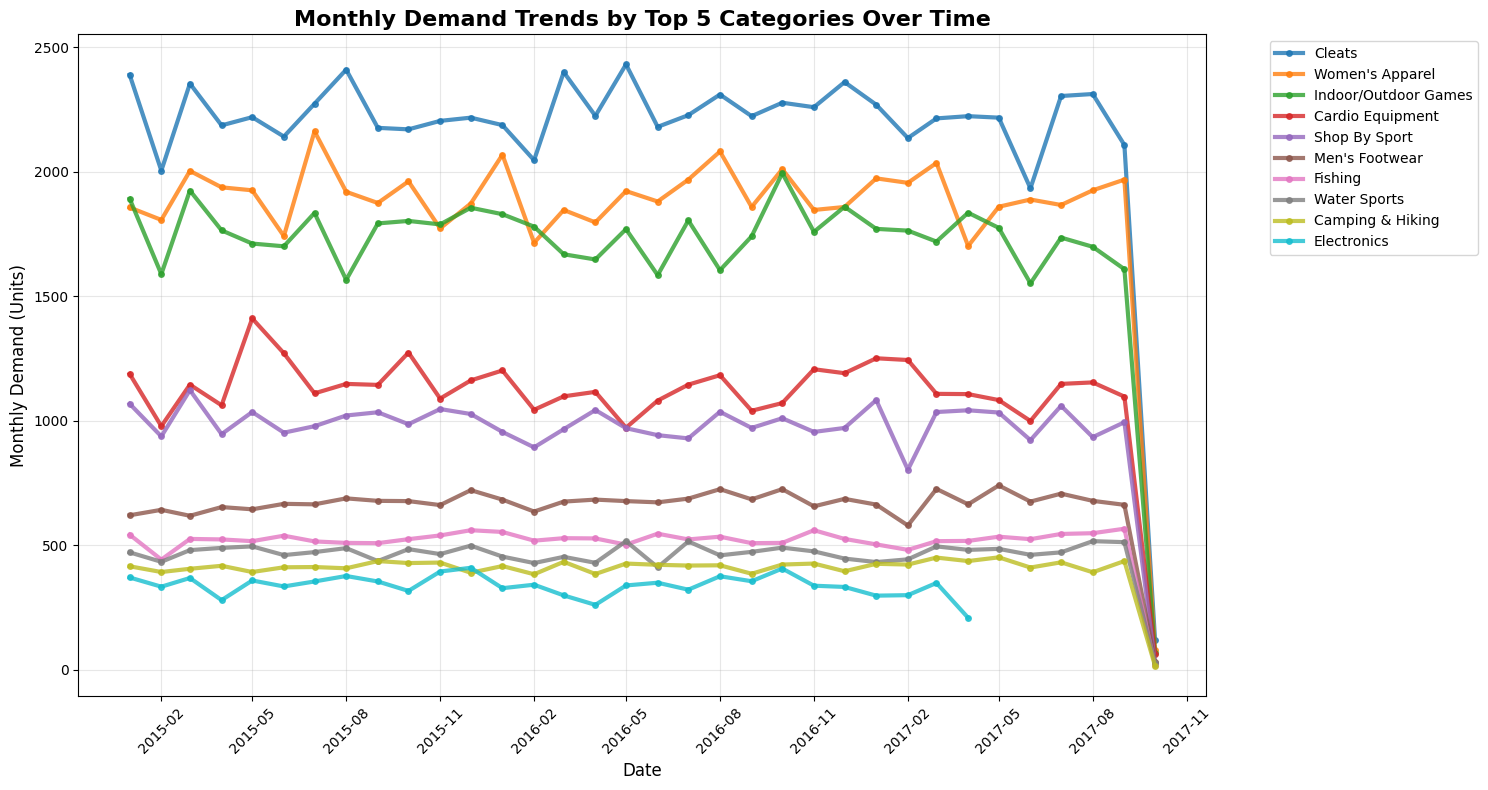

In [58]:
# Graph 1: Monthly Demand Trends by Category (Much Cleaner!)
top_categories = category_summary.head(10)['Category Name'].tolist()
monthly_demand_data = monthly_summary[monthly_summary['Category Name'].isin(top_categories)]

plt.figure(figsize=(15, 8))
for category in top_categories:
    cat_data = monthly_demand_data[monthly_demand_data['Category Name'] == category]
    plt.plot(cat_data['Month_Date'], cat_data['Daily Demand'], 
             label=category, alpha=0.8, linewidth=3, marker='o', markersize=4)

plt.title('Monthly Demand Trends by Top 5 Categories Over Time', fontsize=16, fontweight='bold')
plt.xlabel('Date', fontsize=12)
plt.ylabel('Monthly Demand (Units)', fontsize=12)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)

# Format x-axis to show dates nicely
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=3))
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

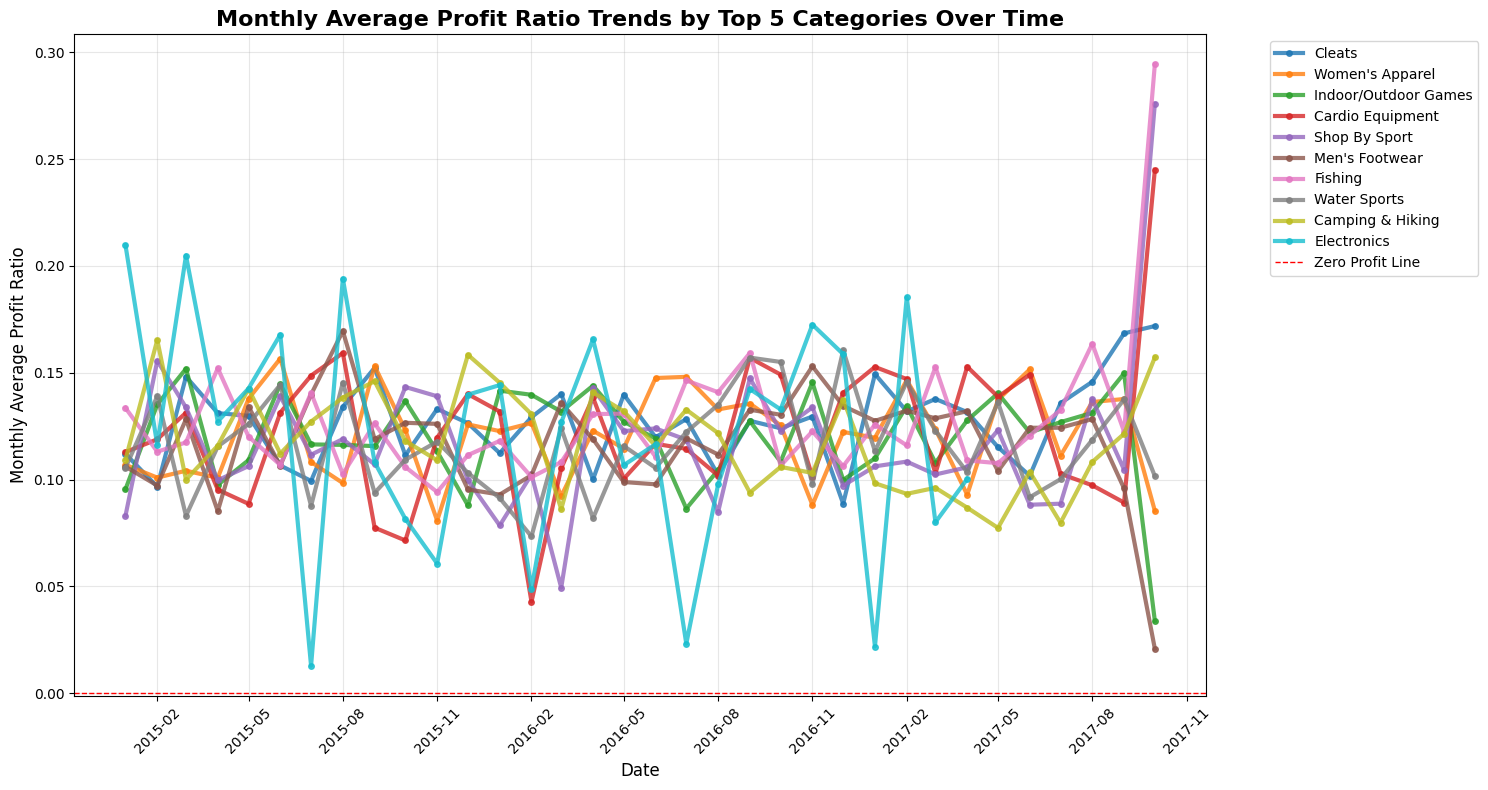

In [59]:
# Graph 2: Monthly Average Profit Ratio Trends (Much Cleaner!)
monthly_profit_data = monthly_summary[monthly_summary['Category Name'].isin(top_categories)]

plt.figure(figsize=(15, 8))
for category in top_categories:
    cat_data = monthly_profit_data[monthly_profit_data['Category Name'] == category]
    plt.plot(cat_data['Month_Date'], cat_data['Avg Profit Ratio'], 
             label=category, alpha=0.8, linewidth=3, marker='o', markersize=4)

plt.title('Monthly Average Profit Ratio Trends by Top 5 Categories Over Time', fontsize=16, fontweight='bold')
plt.xlabel('Date', fontsize=12)
plt.ylabel('Monthly Average Profit Ratio', fontsize=12)
plt.axhline(y=0, color='red', linestyle='--', linewidth=1, label='Zero Profit Line')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)

# Format x-axis to show dates nicely
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=3))
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

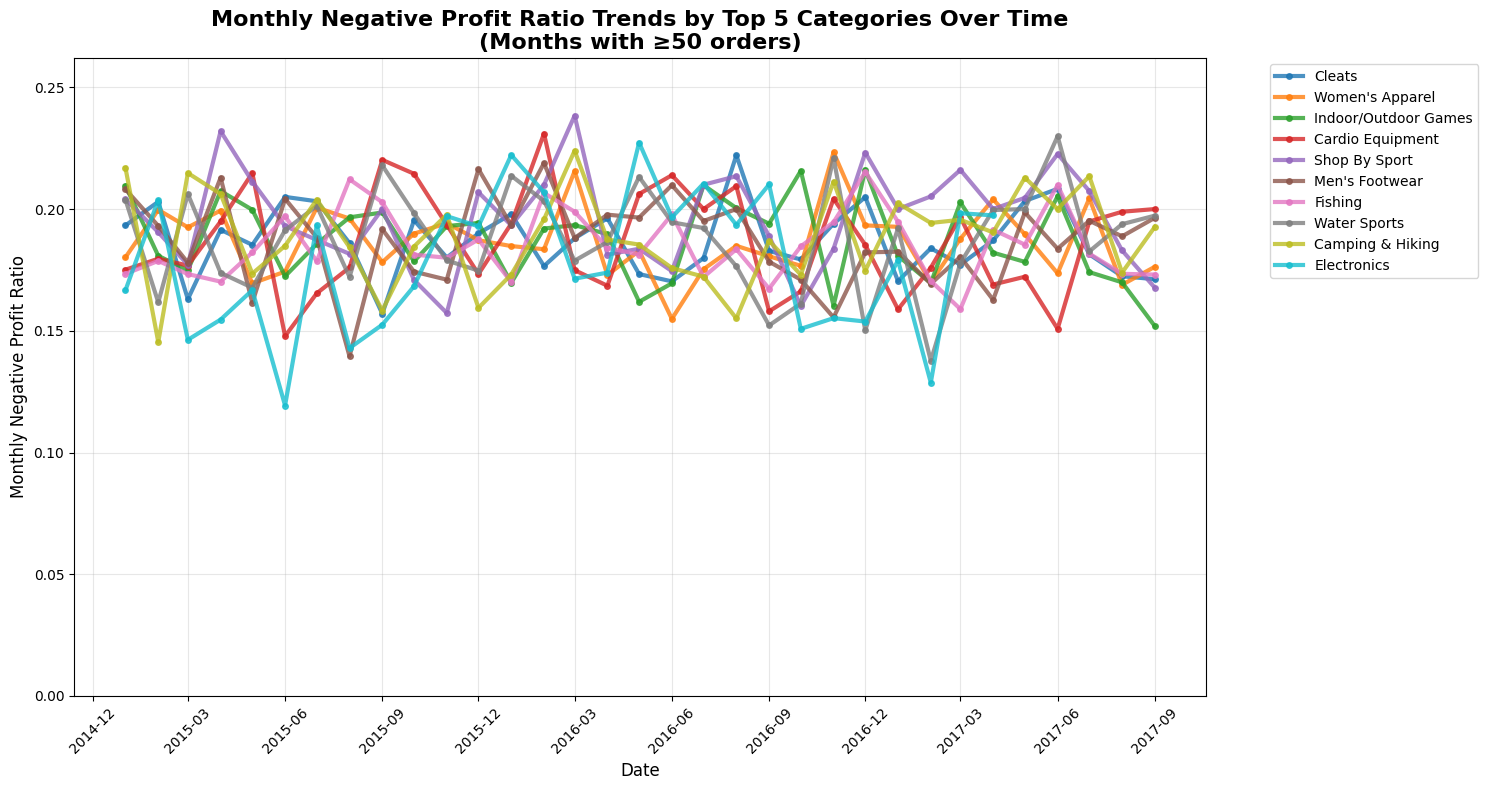

In [60]:
# Graph 3: Monthly Negative Profit Ratio Trends (Much Cleaner!)
# Filter for categories with sufficient monthly orders for meaningful analysis
monthly_filtered_data = monthly_summary[
    (monthly_summary['Category Name'].isin(top_categories)) & 
    (monthly_summary['Total Orders'] >= 50)  # Only include months with at least 50 orders
]

plt.figure(figsize=(15, 8))
for category in top_categories:
    cat_data = monthly_filtered_data[monthly_filtered_data['Category Name'] == category]
    if len(cat_data) > 0:  # Only plot if there's data after filtering
        plt.plot(cat_data['Month_Date'], cat_data['Monthly Negative Profit Ratio'], 
                 label=category, alpha=0.8, linewidth=3, marker='o', markersize=4)

plt.title('Monthly Negative Profit Ratio Trends by Top 5 Categories Over Time\n(Months with ≥50 orders)', 
          fontsize=16, fontweight='bold')
plt.xlabel('Date', fontsize=12)
plt.ylabel('Monthly Negative Profit Ratio', fontsize=12)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)

# Format x-axis to show dates nicely
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=3))
plt.xticks(rotation=45)

# Set reasonable y-axis limits
if len(monthly_filtered_data) > 0:
    plt.ylim(0, min(monthly_filtered_data['Monthly Negative Profit Ratio'].max() * 1.1, 1.0))

plt.tight_layout()
plt.show()

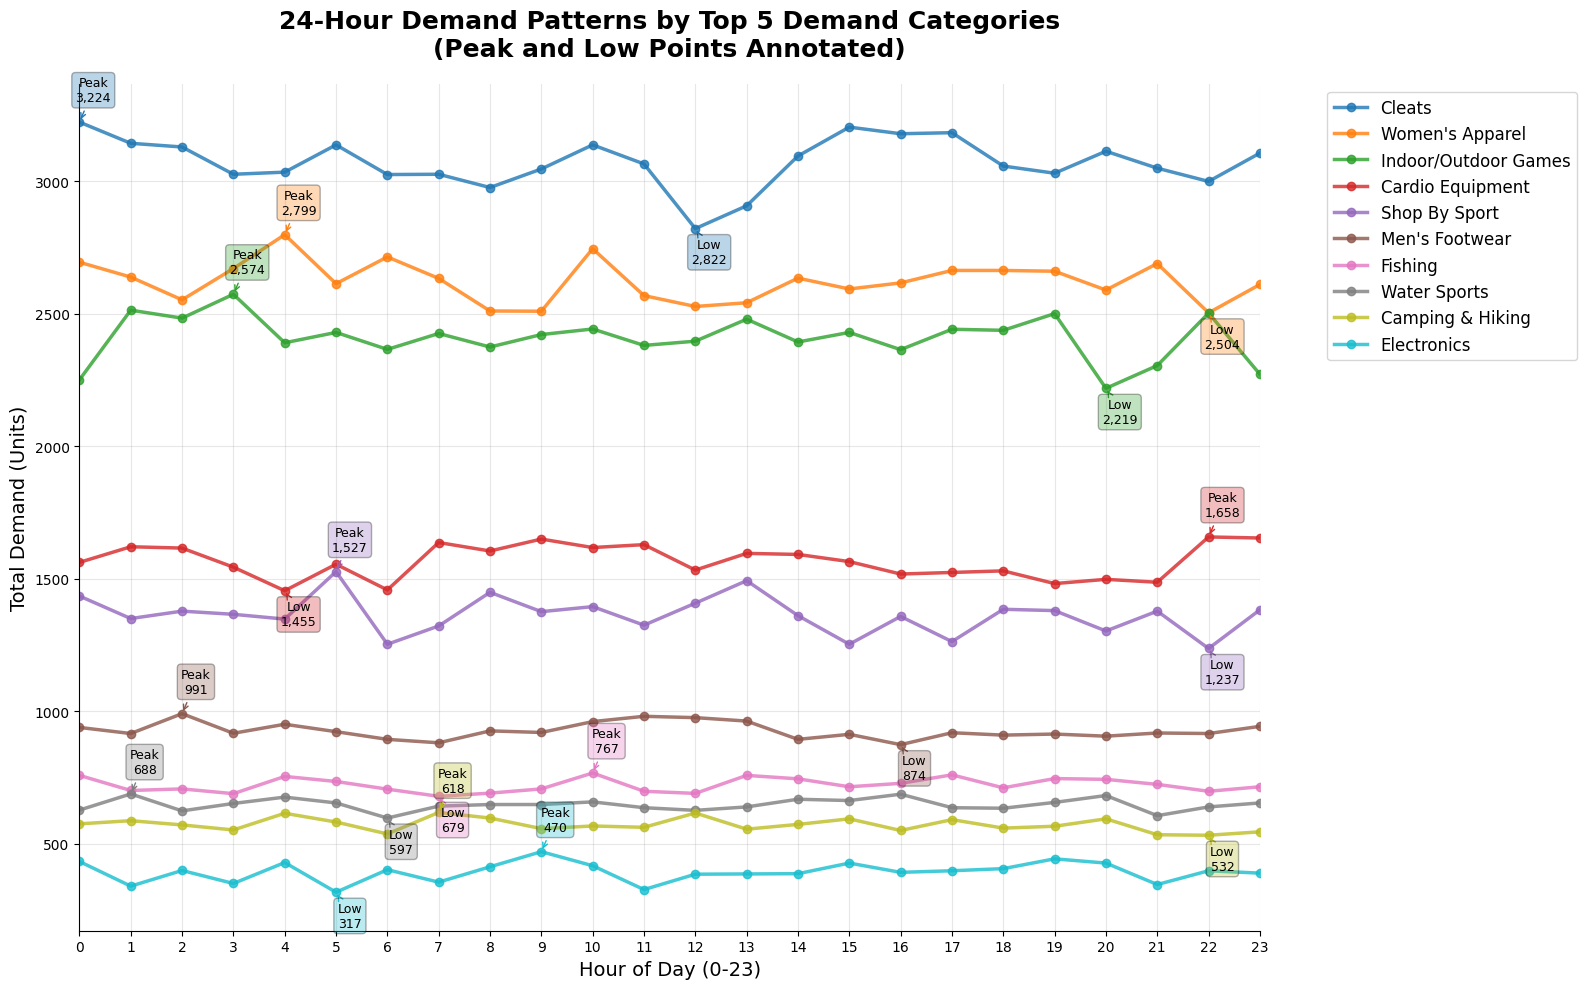

Hourly Demand Insights:
Cleats:
  Peak: 3,224 units at 0:00
  Low: 2,822 units at 12:00

Women's Apparel:
  Peak: 2,799 units at 4:00
  Low: 2,504 units at 22:00

Indoor/Outdoor Games:
  Peak: 2,574 units at 3:00
  Low: 2,219 units at 20:00

Cardio Equipment:
  Peak: 1,658 units at 22:00
  Low: 1,455 units at 4:00

Shop By Sport:
  Peak: 1,527 units at 5:00
  Low: 1,237 units at 22:00

Men's Footwear:
  Peak: 991 units at 2:00
  Low: 874 units at 16:00

Fishing:
  Peak: 767 units at 10:00
  Low: 679 units at 7:00

Water Sports:
  Peak: 688 units at 1:00
  Low: 597 units at 6:00

Camping & Hiking:
  Peak: 618 units at 7:00
  Low: 532 units at 22:00

Electronics:
  Peak: 470 units at 9:00
  Low: 317 units at 5:00



In [63]:
# Hourly Demand Analysis for Top 5 Demand Categories
# First, get the top 5 demand categories
top_demand_categories = category_summary.nlargest(10, 'Total Demand')['Category Name'].tolist()

# Create hourly analysis from the original filtered_data
hourly_data = filtered_data[filtered_data['Category Name'].isin(top_demand_categories)].copy()

# Extract hour from Order Time
hourly_data['Hour'] = pd.to_datetime(hourly_data['Order Time'], format='%H:%M:%S').dt.hour

# Aggregate demand by hour and category
hourly_summary = hourly_data.groupby(['Hour', 'Category Name']).agg({
    'Order Item Quantity': 'sum'  # Total demand per hour per category
}).reset_index()

# Pivot to create a matrix for easier plotting
hourly_pivot = hourly_summary.pivot(index='Hour', columns='Category Name', values='Order Item Quantity').fillna(0)

# Create the 24-hour demand chart with peak and low annotations
plt.figure(figsize=(16, 10))

# Plot each category - extend colors list to handle up to 10 categories
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', 
          '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
for i, category in enumerate(top_demand_categories):
    if category in hourly_pivot.columns:
        plt.plot(hourly_pivot.index, hourly_pivot[category], 
                marker='o', linewidth=2.5, markersize=6, 
                label=category, color=colors[i], alpha=0.8)
        
        # Find and annotate peak and low points
        peak_hour = hourly_pivot[category].idxmax()
        peak_demand = hourly_pivot[category].max()
        low_hour = hourly_pivot[category].idxmin()
        low_demand = hourly_pivot[category].min()
        
        # Annotate peak point
        plt.annotate(f'Peak\n{peak_demand:,.0f}', 
                    xy=(peak_hour, peak_demand), 
                    xytext=(10, 15), textcoords='offset points',
                    bbox=dict(boxstyle='round,pad=0.3', facecolor=colors[i], alpha=0.3),
                    arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0', color=colors[i]),
                    fontsize=9, ha='center')
        
        # Annotate low point
        plt.annotate(f'Low\n{low_demand:,.0f}', 
                    xy=(low_hour, low_demand), 
                    xytext=(10, -25), textcoords='offset points',
                    bbox=dict(boxstyle='round,pad=0.3', facecolor=colors[i], alpha=0.3),
                    arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0', color=colors[i]),
                    fontsize=9, ha='center')

plt.title('24-Hour Demand Patterns by Top 5 Demand Categories\n(Peak and Low Points Annotated)', fontsize=18, fontweight='bold', pad=20)
plt.xlabel('Hour of Day (0-23)', fontsize=14)
plt.ylabel('Total Demand (Units)', fontsize=14)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=12)
plt.grid(True, alpha=0.3)

# Customize x-axis to show all 24 hours
plt.xticks(range(0, 24))
plt.xlim(0, 23)

# Add some styling
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.tight_layout()
plt.show()

# Print some insights
print("Hourly Demand Insights:")
print("=" * 50)
for category in top_demand_categories:
    if category in hourly_pivot.columns:
        peak_hour = hourly_pivot[category].idxmax()
        peak_demand = hourly_pivot[category].max()
        low_hour = hourly_pivot[category].idxmin()
        low_demand = hourly_pivot[category].min()
        print(f"{category}:")
        print(f"  Peak: {peak_demand:,.0f} units at {peak_hour}:00")
        print(f"  Low: {low_demand:,.0f} units at {low_hour}:00")
        print()

In [45]:
# Create Category-Market Demand Analysis DataFrame
# Aggregate demand by Category Name and Market
category_market_summary = filtered_data.groupby(['Category Name', 'Market']).agg({
    'Order Item Quantity': ['sum', 'count', 'mean'],  # Total demand, number of orders, average order size
    'Order Item Product Price': 'mean',  # Average product price
    'Order Item Profit Ratio': 'mean',  # Average profit ratio
    'Benefit per order': ['mean', lambda x: (x < 0).sum()],  # Average benefit and negative profit count
}).reset_index()

# Flatten column names
category_market_summary.columns = ['Category Name', 'Market', 'Total Demand', 'Order Count', 'Avg Order Size', 
                                  'Avg Product Price', 'Avg Profit Ratio', 'Avg Benefit per Order', 'Negative Profit Orders']

# Calculate additional metrics
category_market_summary['Negative Profit Ratio'] = (category_market_summary['Negative Profit Orders'] / 
                                                   category_market_summary['Order Count']).round(4)

# Round numerical columns for better readability
category_market_summary['Avg Order Size'] = category_market_summary['Avg Order Size'].round(2)
category_market_summary['Avg Product Price'] = category_market_summary['Avg Product Price'].round(2)
category_market_summary['Avg Profit Ratio'] = category_market_summary['Avg Profit Ratio'].round(4)
category_market_summary['Avg Benefit per Order'] = category_market_summary['Avg Benefit per Order'].round(2)

# Sort by total demand descending
category_market_summary = category_market_summary.sort_values('Total Demand', ascending=False).reset_index(drop=True)

print("Category-Market Demand Analysis:")
print("=" * 60)
print(f"Dataset shape: {category_market_summary.shape}")
print(f"Unique categories: {category_market_summary['Category Name'].nunique()}")
print(f"Unique markets: {category_market_summary['Market'].nunique()}")
print("\nTop 15 Category-Market combinations by demand:")
print(category_market_summary.head(15)[['Category Name', 'Market', 'Total Demand', 'Order Count', 'Avg Order Size']])

Category-Market Demand Analysis:
Dataset shape: (162, 10)
Unique categories: 50
Unique markets: 5

Top 15 Category-Market combinations by demand:
           Category Name        Market  Total Demand  Order Count  \
0                 Cleats         LATAM         21881         7280   
1                 Cleats        Europe         20343         6805   
2        Women's Apparel         LATAM         18908         6280   
3        Women's Apparel        Europe         17676         5912   
4   Indoor/Outdoor Games         LATAM         17636         5877   
5   Indoor/Outdoor Games        Europe         15692         5201   
6                 Cleats  Pacific Asia         15289         5081   
7        Women's Apparel  Pacific Asia         12630         4209   
8   Indoor/Outdoor Games  Pacific Asia         12108         4048   
9       Cardio Equipment         LATAM         11346         3759   
10                Cleats          USCA         11246         3723   
11      Cardio Equipment  

In [46]:
# Market-wise Analysis: Total demand by market
market_analysis = category_market_summary.groupby('Market').agg({
    'Total Demand': 'sum',
    'Order Count': 'sum', 
    'Category Name': 'nunique'  # Number of unique categories per market
}).reset_index()
market_analysis.columns = ['Market', 'Total Market Demand', 'Total Orders', 'Unique Categories']
market_analysis = market_analysis.sort_values('Total Market Demand', ascending=False)

print("\nMarket Overview:")
print("=" * 40)
print(market_analysis)

# Category-wise Analysis: Which categories dominate each market
print("\nTop 3 Categories by Market:")
print("=" * 40)
for market in market_analysis['Market']:
    market_data = category_market_summary[category_market_summary['Market'] == market].head(3)
    print(f"\n{market}:")
    for _, row in market_data.iterrows():
        print(f"  {row['Category Name']}: {row['Total Demand']:,} units ({row['Order Count']:,} orders)")

# Market share analysis for top categories
top_5_categories = category_summary.head(5)['Category Name'].tolist()
print(f"\nMarket Distribution for Top 5 Categories:")
print("=" * 50)

market_share_data = []
for category in top_5_categories:
    cat_data = category_market_summary[category_market_summary['Category Name'] == category]
    total_cat_demand = cat_data['Total Demand'].sum()
    
    print(f"\n{category} (Total: {total_cat_demand:,} units):")
    for _, row in cat_data.iterrows():
        market_share = (row['Total Demand'] / total_cat_demand) * 100
        print(f"  {row['Market']}: {row['Total Demand']:,} units ({market_share:.1f}%)")
        market_share_data.append({
            'Category': category,
            'Market': row['Market'],
            'Demand': row['Total Demand'],
            'Market_Share_%': market_share
        })

# Create a pivot table for market share visualization
market_share_df = pd.DataFrame(market_share_data)
market_share_pivot = market_share_df.pivot(index='Category', columns='Market', values='Market_Share_%').fillna(0)

print(f"\nMarket Share Matrix (%) for Top 5 Categories:")
print("=" * 60)
print(market_share_pivot.round(1))


Market Overview:
         Market  Total Market Demand  Total Orders  Unique Categories
2         LATAM               112942         51594                 31
1        Europe               105238         50252                 41
3  Pacific Asia                83680         41260                 42
4          USCA                56616         25799                 24
0        Africa                25603         11614                 24

Top 3 Categories by Market:

LATAM:
  Cleats: 21,881 units (7,280 orders)
  Women's Apparel: 18,908 units (6,280 orders)
  Indoor/Outdoor Games: 17,636 units (5,877 orders)

Europe:
  Cleats: 20,343 units (6,805 orders)
  Women's Apparel: 17,676 units (5,912 orders)
  Indoor/Outdoor Games: 15,692 units (5,201 orders)

Pacific Asia:
  Cleats: 15,289 units (5,081 orders)
  Women's Apparel: 12,630 units (4,209 orders)
  Indoor/Outdoor Games: 12,108 units (4,048 orders)

USCA:
  Cleats: 11,246 units (3,723 orders)
  Women's Apparel: 9,560 units (3,215 orders)

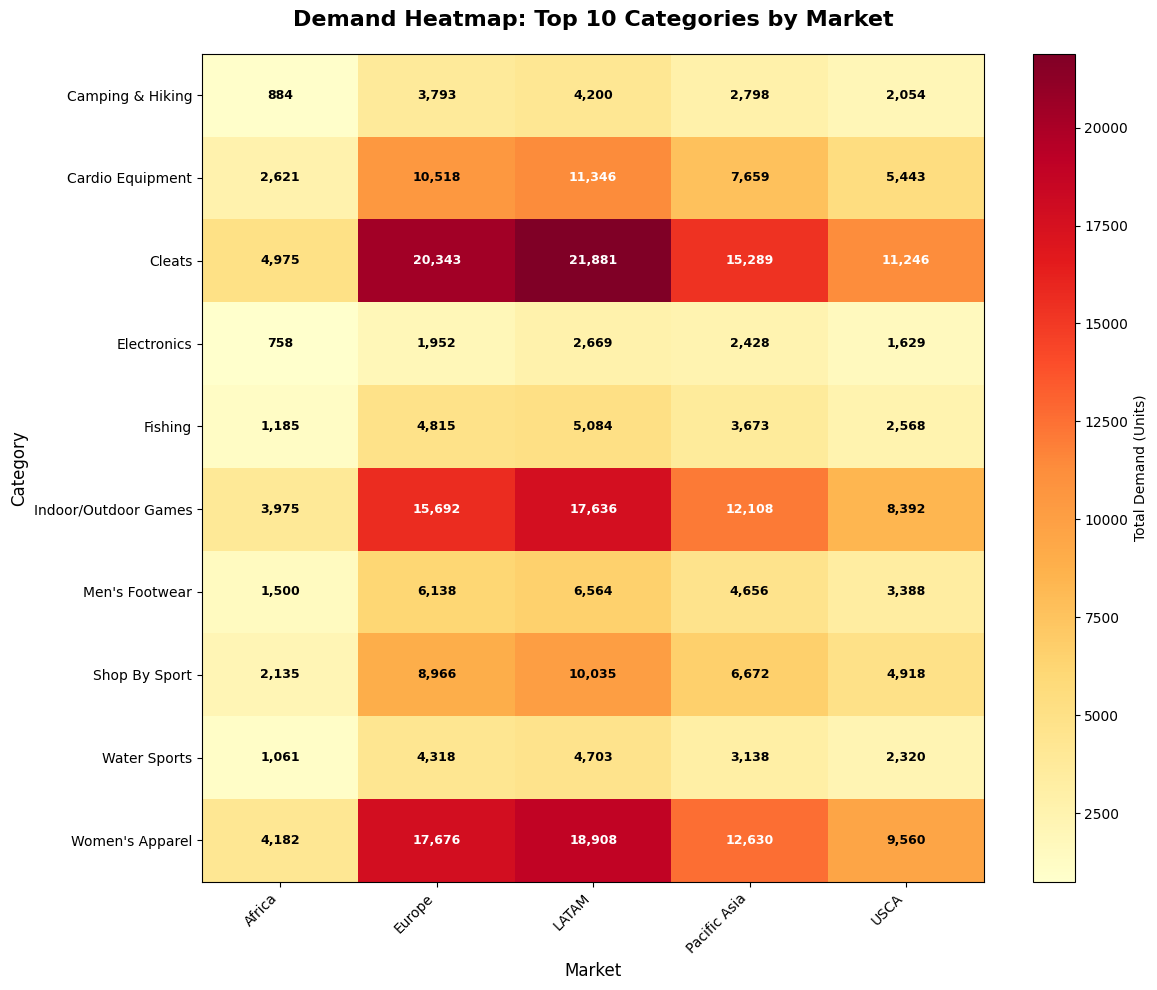


Key Insights:
• Total unique category-market combinations: 162
• Highest demand combination: Cleats in LATAM (21,881 units)
• Average orders per category-market combo: 1114
• Average order size across all combinations: 2.26 units


In [47]:
# Create a heatmap visualization of demand by category and market
# Focus on top 10 categories for better readability
top_10_categories = category_summary.head(10)['Category Name'].tolist()
heatmap_data = category_market_summary[category_market_summary['Category Name'].isin(top_10_categories)]

# Create pivot table for heatmap
demand_heatmap = heatmap_data.pivot(index='Category Name', columns='Market', values='Total Demand').fillna(0)

# Create the heatmap
plt.figure(figsize=(12, 10))
import matplotlib.pyplot as plt

# Create heatmap with color mapping
im = plt.imshow(demand_heatmap.values, cmap='YlOrRd', aspect='auto')

# Set labels
plt.xticks(range(len(demand_heatmap.columns)), demand_heatmap.columns, rotation=45, ha='right')
plt.yticks(range(len(demand_heatmap.index)), demand_heatmap.index)

# Add colorbar
plt.colorbar(im, label='Total Demand (Units)')

# Add text annotations
for i in range(len(demand_heatmap.index)):
    for j in range(len(demand_heatmap.columns)):
        value = demand_heatmap.iloc[i, j]
        if value > 0:
            plt.text(j, i, f'{value:,.0f}', ha='center', va='center', 
                    color='white' if value > demand_heatmap.values.max()/2 else 'black',
                    fontsize=9, fontweight='bold')

plt.title('Demand Heatmap: Top 10 Categories by Market', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Market', fontsize=12)
plt.ylabel('Category', fontsize=12)
plt.tight_layout()
plt.show()

# Summary statistics
print("\nKey Insights:")
print("=" * 40)
print(f"• Total unique category-market combinations: {len(category_market_summary)}")
print(f"• Highest demand combination: {category_market_summary.iloc[0]['Category Name']} in {category_market_summary.iloc[0]['Market']} ({category_market_summary.iloc[0]['Total Demand']:,} units)")
print(f"• Average orders per category-market combo: {category_market_summary['Order Count'].mean():.0f}")
print(f"• Average order size across all combinations: {category_market_summary['Avg Order Size'].mean():.2f} units")

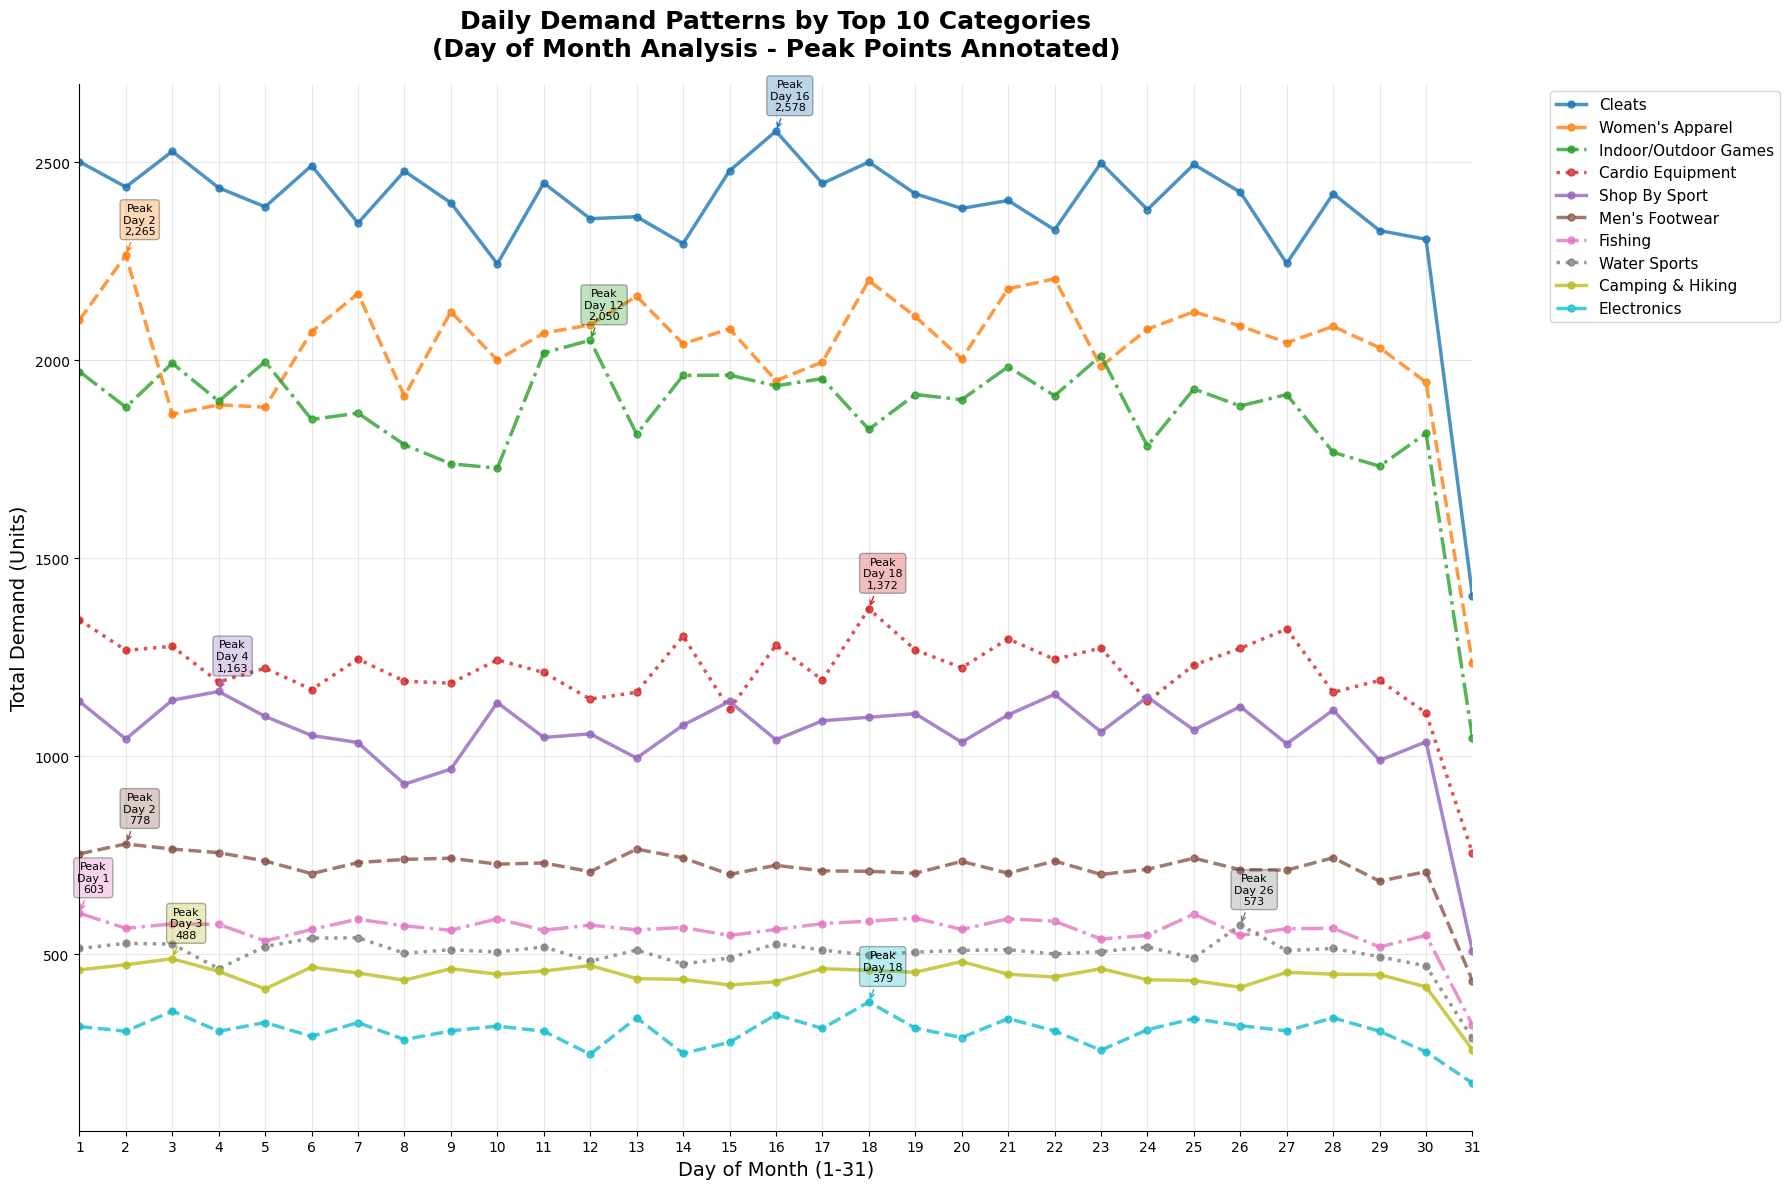


Daily Demand Insights by Day of Month:
Cleats:
  Average daily demand: 2,378.5 units
  Peak: 2,578 units on day 16
  Lowest: 1,404 units on day 31

Women's Apparel:
  Average daily demand: 2,030.8 units
  Peak: 2,265 units on day 2
  Lowest: 1,234 units on day 31

Indoor/Outdoor Games:
  Average daily demand: 1,864.6 units
  Peak: 2,050 units on day 12
  Lowest: 1,045 units on day 31

Cardio Equipment:
  Average daily demand: 1,212.5 units
  Peak: 1,372 units on day 18
  Lowest: 754 units on day 31

Shop By Sport:
  Average daily demand: 1,055.7 units
  Peak: 1,163 units on day 4
  Lowest: 507 units on day 31

Men's Footwear:
  Average daily demand: 717.6 units
  Peak: 778 units on day 2
  Lowest: 433 units on day 31

Fishing:
  Average daily demand: 558.9 units
  Peak: 603 units on day 1
  Lowest: 321 units on day 31

Water Sports:
  Average daily demand: 501.3 units
  Peak: 573 units on day 26
  Lowest: 287 units on day 31

Camping & Hiking:
  Average daily demand: 442.9 units
  Pea

In [67]:
# Daily Demand Analysis by Day of Month for Top 10 Categories
# First, get the top 10 demand categories
top_10_demanded = category_summary.head(10)['Category Name'].tolist()

# Create daily analysis from the original filtered_data
daily_data = filtered_data[filtered_data['Category Name'].isin(top_10_demanded)].copy()

# Convert Order Date to datetime and extract day of month
daily_data['Order Date'] = pd.to_datetime(daily_data['Order Date'])
daily_data['Day_of_Month'] = daily_data['Order Date'].dt.day

# Aggregate demand by day of month and category
daily_summary = daily_data.groupby(['Day_of_Month', 'Category Name']).agg({
    'Order Item Quantity': 'sum'  # Total demand per day of month per category
}).reset_index()

# Pivot to create a matrix for easier plotting
daily_pivot = daily_summary.pivot(index='Day_of_Month', columns='Category Name', values='Order Item Quantity').fillna(0)

# Create the daily demand chart
plt.figure(figsize=(18, 12))

# Plot each category with distinct colors and styles
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', 
          '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
line_styles = ['-', '--', '-.', ':', '-', '--', '-.', ':', '-', '--']

for i, category in enumerate(top_10_demanded):
    if category in daily_pivot.columns:
        plt.plot(daily_pivot.index, daily_pivot[category], 
                marker='o', linewidth=2.5, markersize=5, 
                label=category, color=colors[i % len(colors)], 
                linestyle=line_styles[i % len(line_styles)], alpha=0.8)
        
        # Find and annotate peak and low points
        peak_day = daily_pivot[category].idxmax()
        peak_demand = daily_pivot[category].max()
        low_day = daily_pivot[category].idxmin()
        low_demand = daily_pivot[category].min()
        
        # Annotate peak point
        plt.annotate(f'Peak\nDay {peak_day}\n{peak_demand:,.0f}', 
                    xy=(peak_day, peak_demand), 
                    xytext=(10, 15), textcoords='offset points',
                    bbox=dict(boxstyle='round,pad=0.3', facecolor=colors[i % len(colors)], alpha=0.3),
                    arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0', color=colors[i % len(colors)]),
                    fontsize=8, ha='center')
        


plt.title('Daily Demand Patterns by Top 10 Categories\n(Day of Month Analysis - Peak Points Annotated)', 
          fontsize=18, fontweight='bold', pad=20)
plt.xlabel('Day of Month (1-31)', fontsize=14)
plt.ylabel('Total Demand (Units)', fontsize=14)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=11)
plt.grid(True, alpha=0.3)

# Customize x-axis to show all days of month
plt.xticks(range(1, 32))
plt.xlim(1, 31)

# Add some styling
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.tight_layout()
plt.show()

# Print some insights about daily patterns
print("\nDaily Demand Insights by Day of Month:")
print("=" * 60)

# Calculate average demand per day of month for each category
for category in top_10_demanded:
    if category in daily_pivot.columns:
        avg_demand = daily_pivot[category].mean()
        peak_day = daily_pivot[category].idxmax()
        peak_demand = daily_pivot[category].max()
        low_day = daily_pivot[category].idxmin()
        low_demand = daily_pivot[category].min()
        
        print(f"{category}:")
        print(f"  Average daily demand: {avg_demand:,.1f} units")
        print(f"  Peak: {peak_demand:,.0f} units on day {peak_day}")
        print(f"  Lowest: {low_demand:,.0f} units on day {low_day}")
        print()

# Calculate overall statistics
print("Overall Daily Patterns:")
print("=" * 30)
overall_daily = daily_pivot.sum(axis=1)
peak_overall_day = overall_daily.idxmax()
low_overall_day = overall_daily.idxmin()
print(f"Highest total demand day: Day {peak_overall_day} ({overall_daily[peak_overall_day]:,.0f} total units)")
print(f"Lowest total demand day: Day {low_overall_day} ({overall_daily[low_overall_day]:,.0f} total units)")
print(f"Average daily demand across all categories: {overall_daily.mean():,.1f} units")